In [1]:
import numpy as np
import numpy.linalg as nplg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [ ]:
N1 = train_matrix.shape[0]
N2 = train_matrix.shape[1]

sigma2 = 0.25
d = 10
lam = 1

mean = np.zeros(d)
cov = lam*np.diag(np.ones(d))
objective_all=[]
RMSE_all = []
for runs in range(10):
    
    # Initialize u and v
    u = np.random.multivariate_normal(mean,cov,N1)
    v = np.random.multivariate_normal(mean,cov,N2) 
    objective=[]


    for itr in range(100):
        
        # Update u
        
        for i in range(N1):
            sum1 = np.zeros((10,10))
            sum2 = np.zeros(10)

            for j in np.where(ind_matrix[i]==1)[0]:
                sum1 = sum1 + np.outer(v[j],v[j])
                sum2 = sum2 + (train_matrix[i][j])*v[j]

            u[i] = ((nplg.inv(sigma2*cov + sum1)).dot(sum2.reshape(10,1))).flatten()

        # Update v
        
        for i in range(N2):
            sum1 = np.zeros((10,10))
            sum2 = np.zeros(10)

            for j in np.where(ind_matrix[:,i]==1)[0]:
                sum1 = sum1 + np.outer(u[j],u[j])
                sum2 = sum2 + train_matrix[j][i]*u[j]

            v[i] = ((nplg.inv(sigma2*cov + sum1)).dot(sum2.reshape(10,1))).flatten()

        obj = -np.sum((1.0/(2*sigma2))*np.square(train_matrix - (u.dot(np.transpose(v)))*ind_matrix)) - np.sum((lam/2.0)*np.square(nplg.norm(u,2,1)))- np.sum((lam/2.0)*np.square(nplg.norm(v,2,1)))
        
        objective.append(obj)
        
    print(itr)  
    objective_all.append(objective)
    RMSE_all.append(RMSE(u,v,test))
    
    

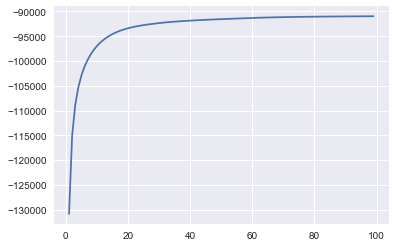

In [25]:
plt.plot(range(1,100),objective_all[0][1:])

In [27]:
RMSE_all

[1.1563327171286979]

## a) Run your code 10 times. For each run, initialize your ui and vj vectors as N(0; I) random vectors.